# Task 5 - Text Classification
**Candidate Name:** Bathula Sai Teja  
**Date/Time:** 2025-09-27

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\punna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\punna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\punna\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Dataset shape after filtering: (30750, 19)

Applying text preprocessing...

Sample preprocessed text:
                                                 text  \
7   Debt collection Attempts to collect debt not o...   
11  Debt collection Attempts to collect debt not o...   
15  Debt collection Written notification about deb...   
22  Credit reporting, credit repair services, or o...   
36  Debt collection False statements or representa...   

                                           clean_text  
7       debt collection attempt collect debt owed nan  
11  debt collection attempt collect debt owed pers...  
15      debt collection written notification debt nan  
22  credit reporting credit repair service persona...  
36  debt collection false statement representation...  

TF-IDF Matrix shape: (30750, 5000)


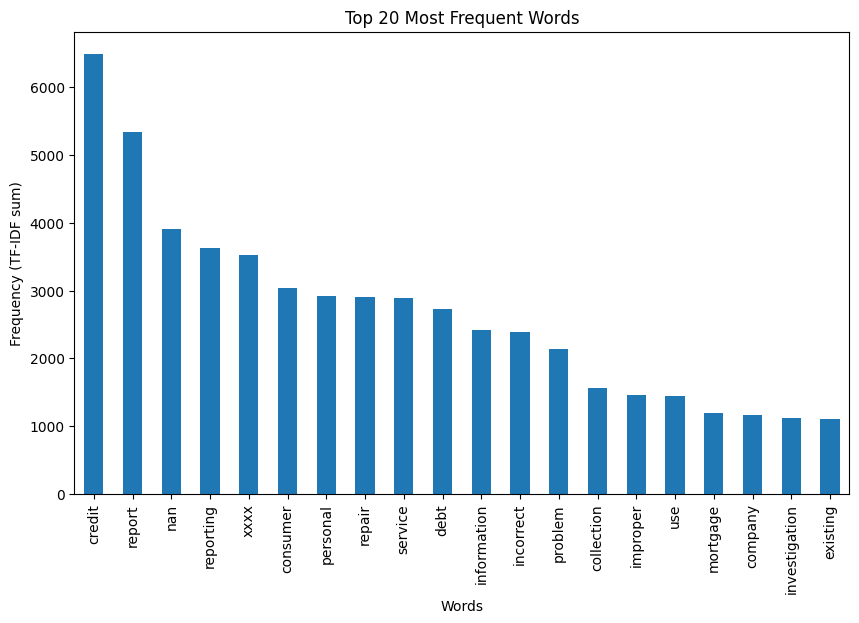

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import sys, os

# --- Ensure Python can find src/ modules ---
sys.path.append(os.path.abspath("../src"))

from preprocessing import preprocess_text   # custom preprocessing function

# Path to sampled dataset
data_path = "../data/consumer_complaints_sample.csv"

# Load dataset
df = pd.read_csv(data_path)

# Map categories
category_map = {
    "Credit reporting, credit repair services, or other personal consumer reports": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
}
df = df[df["Product"].isin(category_map.keys())]
df["label"] = df["Product"].map(category_map)

print("Dataset shape after filtering:", df.shape)

# Combine relevant columns into text
df["text"] = (
    df["Product"].astype(str) + " " +
    df["Issue"].astype(str) + " " +
    df["Consumer complaint narrative"].astype(str)
)

# Apply preprocessing
print("\nApplying text preprocessing...")
df["clean_text"] = df["text"].astype(str).apply(preprocess_text)

print("\nSample preprocessed text:")
print(df[["text", "clean_text"]].head())

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["label"]

print("\nTF-IDF Matrix shape:", X.shape)

# --- Quick visualization: most frequent words ---
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)[:20]

plt.figure(figsize=(10,6))
word_counts.plot(kind="bar")
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency (TF-IDF sum)")
plt.show()


# Task 5 - Text Classification
**Candidate Name:** Bathula Sai Teja  
**Date/Time:** 2025-09-27
